<a href="https://colab.research.google.com/github/Ufoan/Problema-optimizacion/blob/main/CSPSA_wigner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
pip install git+https://github.com/jgidi/cspsa.py

  Cloning https://github.com/jgidi/cspsa.py to /tmp/pip-req-build-z8jwejyx
  Running command git clone --filter=blob:none --quiet https://github.com/jgidi/cspsa.py /tmp/pip-req-build-z8jwejyx
  Resolved https://github.com/jgidi/cspsa.py to commit 9c269c068a441a98653e2e31466180e8ce4fa4ab
  Preparing metadata (setup.py) ... done
  Created wheel for cspsa: filename=cspsa-0.1.0-py3-none-any.whl size=8372 sha256=b93106d3a3dc0271c025acd656b7149d3ef9a527e676b455f10cca551398f4e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-6fraqm07/wheels/07/6b/67/0d0b5dc2a9df68e085dddbc040c5c633e2585e5beb9774ecdc
Successfully built cspsa


In [2]:
def cspsa_optimize(f, z0, a=3, A=0, s=1, b=0.1, r=0.166, max_iters=100, tol=1e-10):
    """
    Parámetros:
    - f: función objetivo
    - z0: punto inicial (complejo)
    - a, A, s, b, r: afectan el tamaño del paso de iteración
    - max_iters: número máximo de iteraciones
    - tol: tolerancia para la convergencia

    Retorna:
    - z_history: solución óptima encontrada
    - z_new: optimo
    """
    z = z0
    z_history = []
    for k in range(1, max_iters + 1):
        # Generar perturbación aleatoria compleja
        delta = np.random.randn() + 1j * np.random.randn()
        a_k = a/(k+1+A)**s
        c_k = b/(k+1)**r
        # Evaluar la función en los puntos perturbados
        f_plus = f(z + c_k*delta)
        f_minus = f(z - c_k*delta)

        # Estimar el gradiente
        grad_estimate = (f_plus - f_minus) / (2 * c_k * np.conj(delta))

        # Actualizar z
        z_new = z-a_k * grad_estimate
        z_history.append(z_new)

        # Verificar convergencia
        if np.abs(z_new - z) < tol:
            return z_history, z_new

        z = z_new
    return z_history, z_new


(4.6963530741903704e-05+7.062855659152239e-05j)


<ipython-input-9-38368f82a79f>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


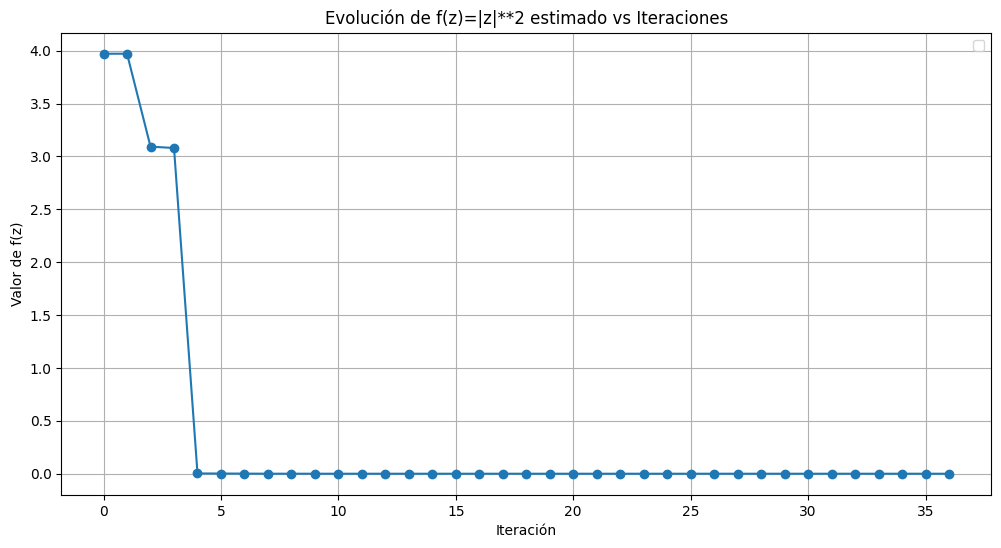

In [ ]:
# Función objetivo
#def objective(z):
#    return np.abs(z)**2

# Punto inicial
#z0 = np.random.randn() + 1j * np.random.randn()

# Optimización
#z_list,z_opt = cspsa_optimize(objective, z0)
#iterations = np.arange(len(z_list))
#f_z = [objective(z) for z in z_list]
#print(z_opt)
#plt.figure(figsize=(12, 6))
#plt.plot(iterations, f_z, marker='o')
#plt.xlabel('Iteración')
#plt.ylabel('Valor de f(z)')
#plt.title('Evolución de f(z)=|z|**2 estimado vs Iteraciones')
#plt.grid(True)
#plt.legend()
#plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Función de wigner estado coherente dado alpha y beta, con alpha_0=x_0+ip_0 y alpha=x+ip
def wigner_estado_coherente(alpha_0,alpha):
    x_0=np.real(alpha_0)
    p_0=np.imag(alpha_0)
    x=np.real(alpha)
    p=np.imag(alpha)
    return np.exp(-2*((x_0-x)**2+(p_0-p)**2))

In [4]:
def objective(z):
    return wigner_estado_coherente(2.5,z)

(2.0822179810562145-1.7097939025840174j)


<ipython-input-5-e2f360155fd8>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


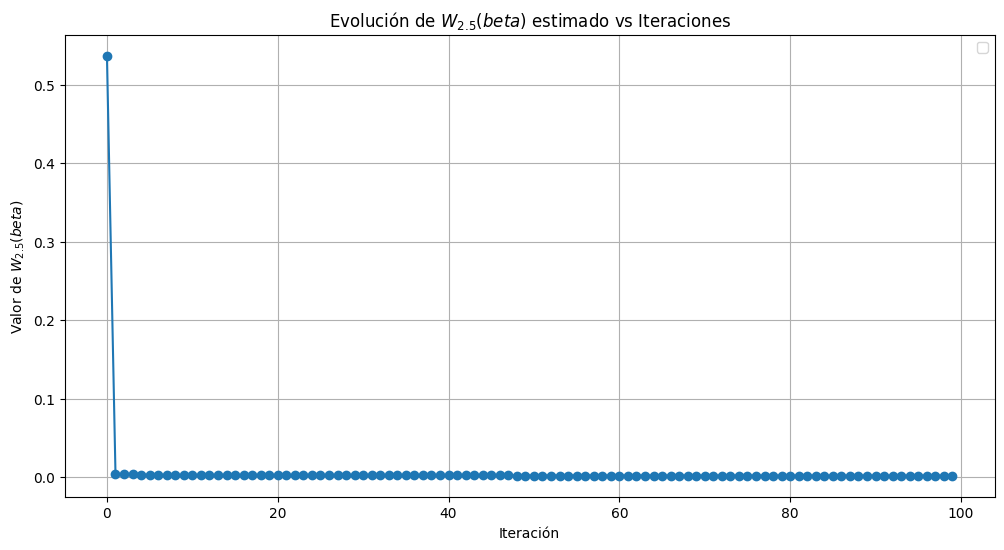

In [5]:
# Punto inicial
z0 = np.random.randn() + 1j * np.random.randn()

# Optimización
z_list,z_opt = cspsa_optimize(objective, z0) #optimize es la función de antes
iterations = np.arange(len(z_list))
f_z = [objective(z) for z in z_list]
print(z_opt)
plt.figure(figsize=(12, 6))
plt.plot(iterations, f_z, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Valor de $W_{2.5}(beta)$')
plt.title('Evolución de $W_{2.5}(beta)$ estimado vs Iteraciones')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
import cspsa

In [ ]:
def f(x):
  z=x[0]+1j*x[1]
  return wigner_estado_coherente(2.5,z)

In [ ]:
guess = [np.real(z0), np.imag(z0)] # Random value to start iterating from

optimizer = cspsa.CSPSA()
sol = optimizer.run(f, guess)

print(f(sol))

5.604874426328997e-07


In [ ]:
min(f_z)

5.627465297980405e-07

In [ ]:
len(z_list)

100

In [7]:
# Función de interferencia en el estado "gato"
def wigner_interferencia(alpha,beta):
    x_0=np.real(alpha)
    p_0=np.imag(alpha)
    x=np.real(beta)
    p=np.imag(beta)
    return np.exp(-2*(x**2+p**2))*np.cos(2j*(alpha.conjugate()*beta-beta.conjugate()*alpha))

# Función de Wigner para el estado "gato"
def wigner_gato(alpha,beta):
    # Factor de normalización
    norm = 1 / (2 + 2 * np.exp(-2 * abs(alpha)**2))

    # Contribuciones individuales
    w_coh_plus = wigner_estado_coherente(alpha,beta)
    w_coh_minus = wigner_estado_coherente(-alpha,beta)
    w_interf = wigner_interferencia(alpha,beta)

    # Suma total
    return norm * (w_coh_plus + w_coh_minus + w_interf)


In [8]:
def objective(z):
    return wigner_gato(2.5,z)

(-0.08998097607714933+0j)


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-9-7a670ce8e8a5>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


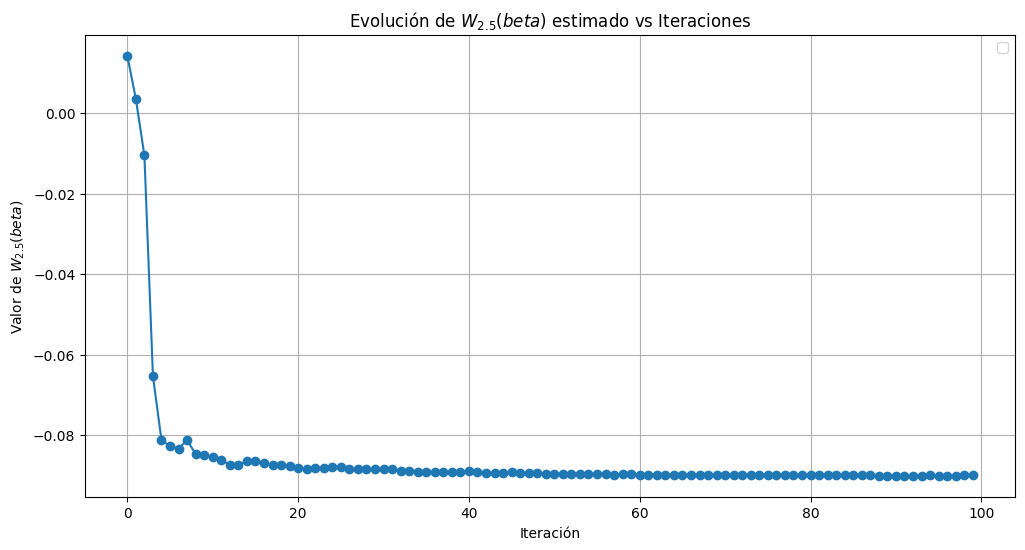

In [9]:
# Punto inicial
z0 = np.random.randn() + 1j * np.random.randn()

# Optimización
z_list,z_opt = cspsa_optimize(objective, z0) #optimize es la función de antes
iterations = np.arange(len(z_list))
f_z = [objective(z) for z in z_list]
print(objective(z_opt))
plt.figure(figsize=(12, 6))
plt.plot(iterations, f_z, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Valor de $W_{2.5}(beta)$')
plt.title('Evolución de $W_{2.5}(beta)$ estimado vs Iteraciones')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
def f(x):
  z=x[0]+1j*x[1]
  return wigner_gato(2.5,z)

In [29]:
guess = [np.real(z0), np.imag(z0)] # Random value to start iterating from

optimizer = cspsa.CSPSA()
sol = optimizer.run(f, guess)

print(f(sol))

(-5.845450115408612e-06+0j)


<ipython-input-10-cae95d6a9284>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  wigner_values[i, j] = wigner_gato(2.5, beta)


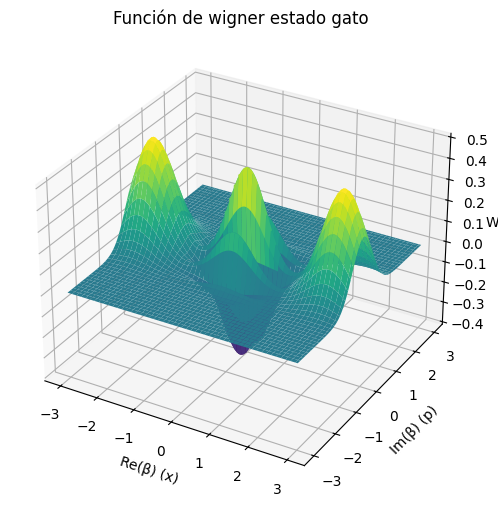

In [10]:

x = np.linspace(-3, 3, 100)
p = np.linspace(-3, 3, 100)
x_grid, p_grid = np.meshgrid(x, p)


wigner_values = np.zeros_like(x_grid)
for i in range(len(x)):
    for j in range(len(p)):
        beta = x_grid[i, j] + 1j * p_grid[i, j]
        wigner_values[i, j] = wigner_gato(2.5, beta)


fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_grid, p_grid, wigner_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('Re(β) (x)')
ax.set_ylabel('Im(β) (p)')
ax.set_zlabel('W(β)')
ax.set_title('Función de wigner estado gato')
plt.show()

In [11]:
results =[]
for i in range(50):
    # Punto inicial
    z0 = np.random.randn() + 1j * np.random.randn()
    # Optimización
    z_list,z_opt = cspsa_optimize(objective, z0)
    results.append(z_list)

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(results).transpose()

In [15]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.506478-0.080926j,-0.148984+1.479291j,1.415024-1.851987j,-0.934195-1.342203j,0.560109-1.107156j,0.560639+1.044549j,0.479709+1.373372j,1.025081-0.933286j,1.284651+0.028539j,-0.564463-0.811486j,...,1.419024+0.181993j,-0.748170+2.297781j,0.359825-1.049679j,-0.603291+1.429616j,1.354162-1.171633j,1.862490+0.585998j,0.401896+0.998381j,-1.183825+0.438302j,-1.089959-0.107111j,-0.542710+0.124629j
1,0.319249-0.131112j,-0.160227+1.515860j,1.415142-1.852227j,-0.944235-1.343813j,0.587254-1.104154j,0.483995+1.034434j,0.468250+1.433245j,1.025052-0.933357j,1.232160+0.095415j,-0.391876-1.125287j,...,1.242626+0.145987j,-0.748168+2.297724j,0.390928-1.045544j,-0.624848+1.452931j,1.354529-1.177553j,1.907938+0.670863j,0.463073+0.979114j,-1.032689+0.374565j,-1.258010-0.451883j,-0.659992+2.259552j
2,0.780662-0.190612j,-0.159185+1.517820j,1.415123-1.852221j,-0.951491-1.345279j,0.608930-1.101362j,0.354294+0.975915j,0.482037+1.440754j,1.025890-0.934973j,1.173644+0.107115j,-0.343462-0.955267j,...,1.117464+0.244771j,-0.748173+2.297685j,0.462154-0.779710j,-0.627214+1.470606j,1.354037-1.176920j,1.929010+0.694705j,0.300319+0.849878j,-1.068733+0.183560j,-1.252298-0.368205j,-0.660021+2.259519j
3,0.893315-0.835218j,-0.157742+1.518047j,1.415194-1.852292j,-0.952879-1.360375j,0.656760-1.002607j,0.257828+0.953232j,0.492132+1.460487j,0.994055-0.929964j,1.090088+0.148518j,-0.312581-0.958587j,...,0.983891+0.277931j,-0.748186+2.297664j,0.386065-0.790869j,-0.631094+1.478981j,1.353298-1.175552j,1.814214+0.681631j,0.253068+1.200342j,-0.929082+0.231991j,-1.165869-0.378782j,-0.659988+2.259501j
4,0.888223-0.834234j,-0.156410+1.518684j,1.415053-1.852538j,-0.959246-1.363943j,0.633286-0.934380j,0.322002+0.852742j,0.494164+1.476567j,0.966947-0.919436j,1.080695+0.148200j,-0.301821-0.868090j,...,0.933740+0.247394j,-0.748169+2.297654j,0.492659-1.165365j,-0.629102+1.487733j,1.353814-1.177420j,1.797045+0.669002j,0.266716+1.196501j,-0.749313+0.353297j,-1.149159-0.337201j,-0.659981+2.259467j


In [16]:
df_wigner_values = df.map(lambda x: (wigner_gato(2.5,x)))

In [17]:
df_wigner_values.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.204038+0.000000j,-0.003665+0.000000j,0.000059+0.000000j,0.001660+0.000000j,0.001769+0.000000j,-0.015693+0.000000j,0.002853+0.000000j,-0.009533+0.000000j,0.043674+0.000000j,-0.018196+0.000000j,...,0.043155+0.000000j,-0.000002+0.000000j,-0.020375+0.000000j,-0.000635+0.000000j,0.002865+0.000000j,0.111829+0.000000j,-0.041789+0.000000j,0.003974+0.000000j,0.030920+0.000000j,0.085976+0.000000j
1,0.101205+0.000000j,-0.004089+0.000000j,0.000059+0.000000j,0.001567+0.000000j,0.001035+0.000000j,-0.022301+0.000000j,-0.001026+0.000000j,-0.009533+0.000000j,0.033349+0.000000j,0.007441+0.000000j,...,0.022705+0.000000j,-0.000002+0.000000j,-0.021269+0.000000j,-0.001277+0.000000j,0.002824+0.000000j,0.100955+0.000000j,-0.044671+0.000000j,-0.031738+0.000000j,0.012499+0.000000j,-0.000006+0.000000j
2,-0.043965+0.000000j,-0.004092+0.000000j,0.000059+0.000000j,0.001496+0.000000j,0.000414+0.000000j,-0.054687+0.000000j,-0.001318+0.000000j,-0.009448+0.000000j,0.029381+0.000000j,-0.063136+0.000000j,...,-0.018362+0.000000j,-0.000002+0.000000j,0.005534+0.000000j,-0.001616+0.000000j,0.002825+0.000000j,0.099305+0.000000j,-0.059170+0.000000j,-0.004689+0.000000j,0.002745+0.000000j,-0.000006+0.000000j
3,-0.011291+0.000000j,-0.004095+0.000000j,0.000059+0.000000j,0.001124+0.000000j,-0.023230+0.000000j,-0.070704+0.000000j,-0.001947+0.000000j,-0.011242+0.000000j,0.012777+0.000000j,-0.064605+0.000000j,...,-0.053477+0.000000j,-0.000002+0.000000j,-0.005790+0.000000j,-0.001718+0.000000j,0.002830+0.000000j,0.077309+0.000000j,0.020849+0.000000j,-0.051174+0.000000j,-0.009092+0.000000j,-0.000006+0.000000j
4,-0.011349+0.000000j,-0.004098+0.000000j,0.000059+0.000000j,0.001023+0.000000j,-0.038899+0.000000j,-0.059183+0.000000j,-0.002302+0.000000j,-0.012996+0.000000j,0.012620+0.000000j,-0.067926+0.000000j,...,-0.057475+0.000000j,-0.000002+0.000000j,0.012456+0.000000j,-0.001821+0.000000j,0.002820+0.000000j,0.076328+0.000000j,0.020415+0.000000j,-0.116295+0.000000j,-0.017283+0.000000j,-0.000006+0.000000j


In [18]:
df_wigner_values.iloc[0].min()

np.complex128(-0.04178935803234485+0j)

In [19]:
df_wigner_values.iloc[0].max()

np.complex128(0.4123324650802008+0j)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


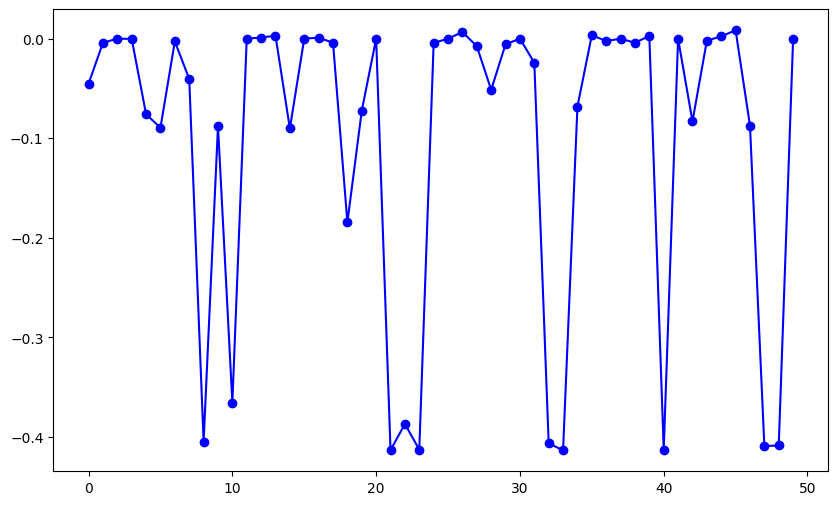

In [20]:
#Minimo por iteración
plt.figure(figsize=(10, 6))
plt.plot(df_wigner_values.min().index, df_wigner_values.min().values, marker='o', linestyle='-', color='b')

In [21]:
results_2 =[]
for i in range(10):
    # Punto inicial
    z0 = np.random.randn() + 1j * np.random.randn()
    # Optimización
    z_list,z_opt = cspsa_optimize(objective, z0)
    results_2.append(z_list)

In [22]:
df_2 = pd.DataFrame(results_2).transpose()
df_wigner_values_2 = df_2.map(lambda x: np.real(wigner_gato(2.5,x)))

In [23]:
df_wigner_values_2

,0,1,2,3,4,5,6,7,8,9
0,0.049232,0.023283,0.003702,0.021002,-0.251266,-0.029017,-0.084135,0.016102,-0.003200,-0.000005
1,0.039107,0.022118,0.003696,0.014831,0.000348,-0.001915,-0.076573,-0.045408,-0.004127,-0.000005
2,0.038595,0.020934,0.003642,0.014734,0.000347,-0.001917,-0.076005,0.233547,-0.004183,-0.000005
3,0.038569,0.020434,0.003618,0.013671,0.000348,-0.001948,-0.004141,-0.018987,-0.004180,-0.000005
4,0.028680,0.018725,0.003542,0.013621,0.000347,-0.001948,-0.082098,-0.097987,-0.004180,-0.000005
...,...,...,...,...,...,...,...,...,...,...
95,-0.048768,-0.003086,0.001985,0.004412,0.000346,-0.002775,-0.090297,-0.019812,-0.004184,-0.000005
96,-0.048806,-0.003122,0.001974,0.004402,0.000346,-0.002775,-0.090322,-0.019924,-0.004184,-0.000005
97,-0.050713,-0.003161,0.001962,0.004393,0.000346,-0.002775,-0.090354,-0.020086,-0.004184,-0.000005
98,-0.052354,-0.003168,0.001962,0.004373,0.000346,-0.002778,-0.090352,-0.020159,-0.004184,-0.000005


In [24]:
df_wigner_values_2.min()

,0
0,-0.052449
1,-0.003229
2,0.001951
3,0.004371
4,-0.251266
5,-0.029017
6,-0.090388
7,-0.097987
8,-0.004190
9,-0.000005


In [30]:
def g(x):
  z=x[0]+1j*x[1]
  return wigner_gato(2.5,z)
resultados_cspsa_importada = []
for i in range(1000):
  guess = [np.random.randn(),np.random.randn()]
  optimizer = cspsa.CSPSA()
  sol = optimizer.run(g, guess)
  resultados_cspsa_importada.append(g(sol))


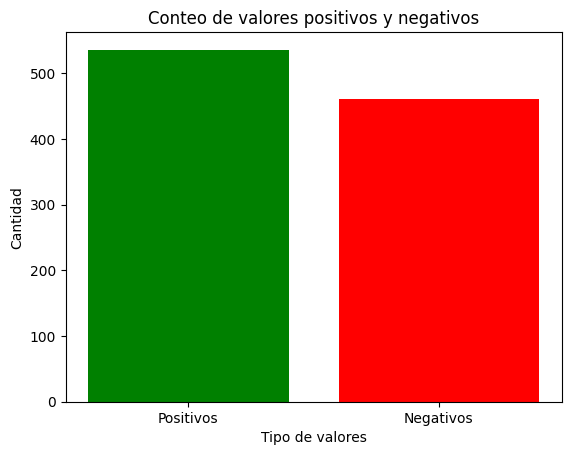

In [31]:
k = 0
j = 0
for i in range(len(resultados_cspsa_importada)):
  if np.real(resultados_cspsa_importada[i]) < 0:
    k+=1
  elif np.real(resultados_cspsa_importada[i]) > 0:
    j+=1

labels = ['Positivos', 'Negativos']
values = [j, k]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Tipo de valores')
plt.ylabel('Cantidad')
plt.title('Conteo de valores positivos y negativos')
plt.show()

In [32]:
results_2 =[]
for i in range(1000):
    # Punto inicial
    z0 = np.random.randn() + 1j * np.random.randn()
    # Optimización
    z_list,z_opt = cspsa_optimize(objective, z0)
    results_2.append(wigner_gato(2.5,z_opt))

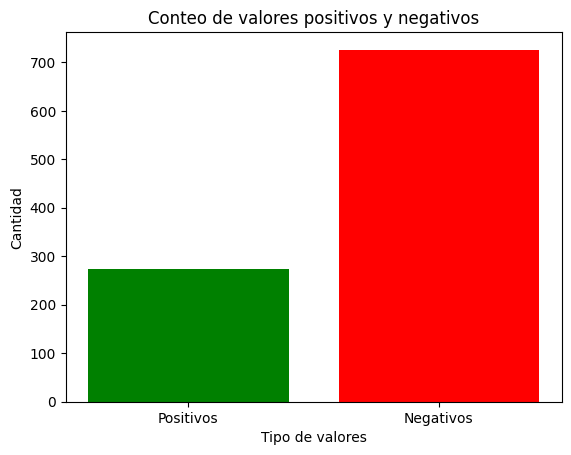

In [33]:
k = 0
j = 0
for i in range(len(results_2)):
  if np.real(results_2[i]) < 0:
    k+=1
  elif np.real(results_2[i]) > 0:
    j+=1

labels = ['Positivos', 'Negativos']
values = [j, k]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Tipo de valores')
plt.ylabel('Cantidad')
plt.title('Conteo de valores positivos y negativos')
plt.show()

Hay 294 positivos y 706 negativos.


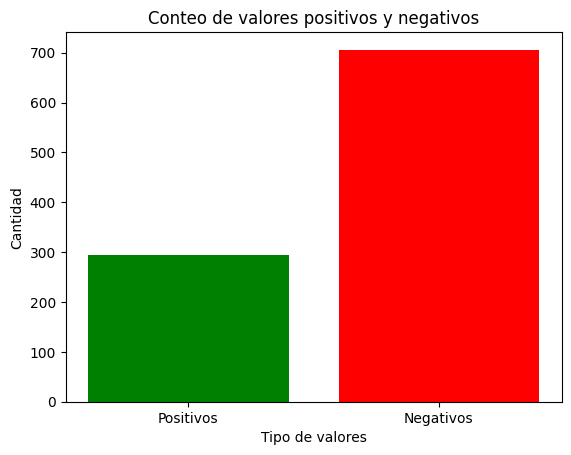

In [34]:
results_2 =[]
for i in range(1000):
    # Punto inicial
    z0 = np.random.randn() + 1j * np.random.randn()
    # Optimización
    z_list,z_opt = cspsa_optimize(objective, z0)
    results_2.append(wigner_gato(2.5,z_opt))

k = 0
j = 0
for i in range(len(results_2)):
  if np.real(results_2[i]) < 0:
    k+=1
  elif np.real(results_2[i]) > 0:
    j+=1

labels = ['Positivos', 'Negativos']
values = [j, k]
print(f'Hay {j} positivos y {k} negativos.')
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Tipo de valores')
plt.ylabel('Cantidad')
plt.title('Conteo de valores positivos y negativos')
plt.show()

Hay 285 positivos y 715 negativos.


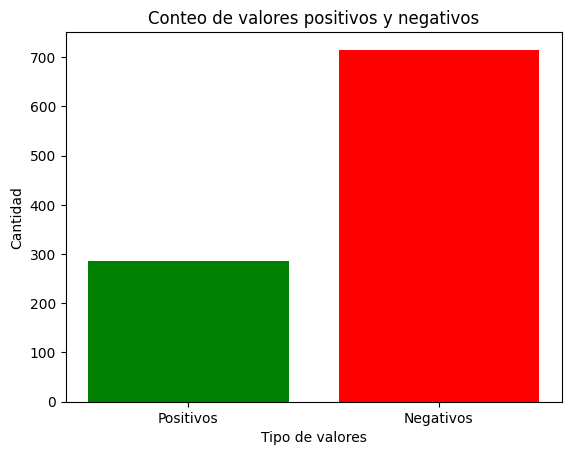

In [35]:
results_2 =[]
for i in range(1000):
    # Punto inicial
    z0 = np.random.randn() + 1j * np.random.randn()
    # Optimización
    z_list,z_opt = cspsa_optimize(objective, z0)
    results_2.append(wigner_gato(2.5,z_opt))

k = 0
j = 0
for i in range(len(results_2)):
  if np.real(results_2[i]) < 0:
    k+=1
  elif np.real(results_2[i]) > 0:
    j+=1

labels = ['Positivos', 'Negativos']
values = [j, k]
print(f'Hay {j} positivos y {k} negativos.')
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Tipo de valores')
plt.ylabel('Cantidad')
plt.title('Conteo de valores positivos y negativos')
plt.show()

Hay 518 positivos y 480 negativos.


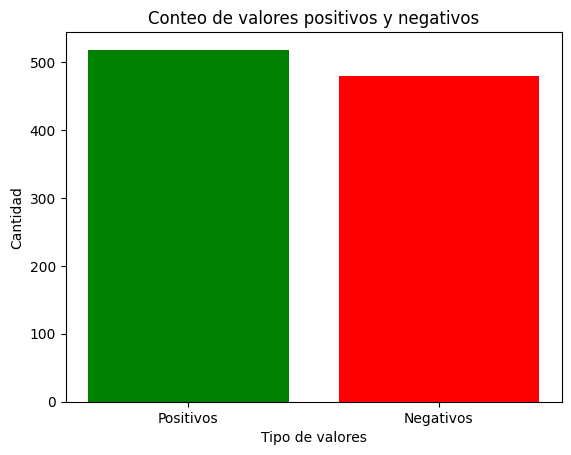

In [36]:
def g(x):
  z=x[0]+1j*x[1]
  return wigner_gato(2.5,z)
resultados_cspsa_importada = []
for i in range(1000):
  guess = [np.random.randn(),np.random.randn()]
  optimizer = cspsa.CSPSA()
  sol = optimizer.run(g, guess)
  resultados_cspsa_importada.append(g(sol))

k = 0
j = 0
for i in range(len(resultados_cspsa_importada)):
  if np.real(resultados_cspsa_importada[i]) < 0:
    k+=1
  elif np.real(resultados_cspsa_importada[i]) > 0:
    j+=1

labels = ['Positivos', 'Negativos']
values = [j, k]
print(f'Hay {j} positivos y {k} negativos.')
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Tipo de valores')
plt.ylabel('Cantidad')
plt.title('Conteo de valores positivos y negativos')
plt.show()